# Initial EDA on the Mental Health Dataset

In this notebook, our goal is to do initial exploratory analysis of one of the mental health CSV files and get a sense of the data at hand. We also hope to get some insights to help us understand the data and later inform our prompt engineering strategy for LLM-based structured extraction.


In [1]:
# # List files in the "data" directory:
!ls data

# Preview the first few lines of a candidate file (replace <filename> with the actual file name)
!head -n 5 data/mentalhealth_post_features_tfidf_256.csv

COVID19_support_post_features_tfidf_256.csv
EDAnonymous_2019_features_tfidf_256.csv
EDAnonymous_post_features_tfidf_256.csv
EDAnonymous_pre_features_tfidf_256.csv
addiction_2018_features_tfidf_256.csv
addiction_2019_features_tfidf_256.csv
addiction_post_features_tfidf_256.csv
addiction_pre_features_tfidf_256.csv
adhd_2018_features_tfidf_256.csv
adhd_2019_features_tfidf_256.csv
adhd_post_features_tfidf_256.csv
adhd_pre_features_tfidf_256.csv
alcoholism_2018_features_tfidf_256.csv
alcoholism_2019_features_tfidf_256.csv
alcoholism_post_features_tfidf_256.csv
alcoholism_pre_features_tfidf_256.csv
anxiety_2018_features_tfidf_256.csv
anxiety_2019_features_tfidf_256.csv
anxiety_post_features_tfidf_256.csv
anxiety_pre_features_tfidf_256.csv
autism_2018_features_tfidf_256.csv
autism_2019_features_tfidf_256.csv
autism_post_features_tfidf_256.csv
autism_pre_features_tfidf_256.csv
bipolarreddit_2018_features_tfidf_256.csv
bipolarreddit_2019_features_tfidf_256.csv
bipolarreddit_post_features_tfidf_

In [2]:
!pip install tabulate

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Ensure inline plotting in notebooks
%matplotlib inline

## Step 1: Loading Dataset



In [4]:
file_name = 'data/mentalhealth_post_features_tfidf_256.csv'

try:
    data = pd.read_csv(file_name)
    print(f"Successfully loaded {file_name}")
except Exception as e:
    print(f"Error loading file: {e}")
    raise

Successfully loaded data/mentalhealth_post_features_tfidf_256.csv


## Step 2: Basic Statistics and Overview

We examine the dataset's shape and basic statistics.


In [5]:
print("Columns in the dataset:")
print(data.columns.tolist())
display(data.head())


print("Dataset Shape:", data.shape)
print("\nBasic Statistics:")
print(data.describe(include='all'))


Columns in the dataset:
['subreddit', 'author', 'date', 'post', 'automated_readability_index', 'coleman_liau_index', 'flesch_kincaid_grade_level', 'flesch_reading_ease', 'gulpease_index', 'gunning_fog_index', 'lix', 'smog_index', 'wiener_sachtextformel', 'n_chars', 'n_long_words', 'n_monosyllable_words', 'n_polysyllable_words', 'n_sents', 'n_syllables', 'n_unique_words', 'n_words', 'sent_neg', 'sent_neu', 'sent_pos', 'sent_compound', 'economic_stress_total', 'isolation_total', 'substance_use_total', 'guns_total', 'domestic_stress_total', 'suicidality_total', 'punctuation', 'liwc_1st_pers', 'liwc_2nd_pers', 'liwc_3rd_pers', 'liwc_achievement', 'liwc_adverbs', 'liwc_affective_processes', 'liwc_anger', 'liwc_anxiety', 'liwc_articles_article', 'liwc_assent', 'liwc_auxiliary_verbs', 'liwc_biological', 'liwc_body', 'liwc_causation', 'liwc_certainty', 'liwc_cognitive', 'liwc_common_verbs', 'liwc_conjunctions', 'liwc_death', 'liwc_discrepancy', 'liwc_exclusive', 'liwc_family', 'liwc_feel', 'li

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,mentalhealth,Autumfire117,2020/01/01,"Not depressed or suicidal, yet the thought of ...",6.283511,5.687673,6.568202,80.795116,66.002584,9.955408,...,0.0,0.139581,0.000000,0.000000,0.0,0.000000,0.051431,0.000000,0.0,0.093246
1,mentalhealth,elf_boy_,2020/01/01,How I Barely Survived the Last Decade Trigger ...,4.953877,6.139650,5.820522,78.808202,69.141398,9.052063,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.020834,0.096198,0.0,0.245525
2,mentalhealth,mcks02,2020/01/01,Coping skills I was wondering if anyone had an...,0.919777,2.657734,3.307321,90.400864,80.951220,6.229480,...,0.0,0.000000,0.137643,0.092402,0.0,0.000000,0.000000,0.000000,0.0,0.081734
3,mentalhealth,IAndrOwS,2020/01/01,Overcoming a Mental Illness is Like Trying to ...,1.398685,4.035708,2.814915,88.778398,87.263069,5.481930,...,0.0,0.000000,0.000000,0.179770,0.0,0.062912,0.087707,0.000000,0.0,0.079508
4,mentalhealth,Nyteblk,2020/01/01,Sooo I need your help I’m going to lead with w...,5.030568,5.675974,6.477938,76.127234,68.640288,9.055476,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.258315,0.0,0.152145


Dataset Shape: (13514, 350)

Basic Statistics:
           subreddit        author        date  \
count          13514         13514       13514   
unique             1         13514         111   
top     mentalhealth  Autumfire117  2020/01/08   
freq           13514             1         176   
mean             NaN           NaN         NaN   
std              NaN           NaN         NaN   
min              NaN           NaN         NaN   
25%              NaN           NaN         NaN   
50%              NaN           NaN         NaN   
75%              NaN           NaN         NaN   
max              NaN           NaN         NaN   

                                                     post  \
count                                               13514   
unique                                              13512   
top     i need some advice this is going to sound real...   
freq                                                    2   
mean                                           

## Step 3: Text Length and Readability Analysis

Our dataset contains the post text in the column `post`.
We compute the word count and inspect readability metrics.

**Columns to note:**  
- `post`: text content  
- Readability metrics (e.g., `automated_readability_index`, `flesch_reading_ease`, etc.)

Word Count Statistics:
count    13514.000000
mean       213.899142
std        211.859389
min          2.000000
25%         86.000000
50%        156.000000
75%        269.000000
max       4952.000000
Name: word_count, dtype: float64


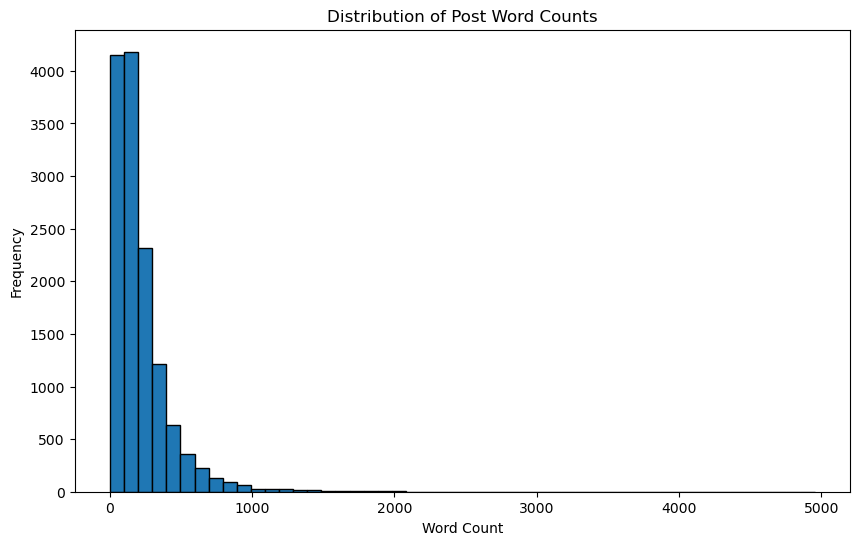

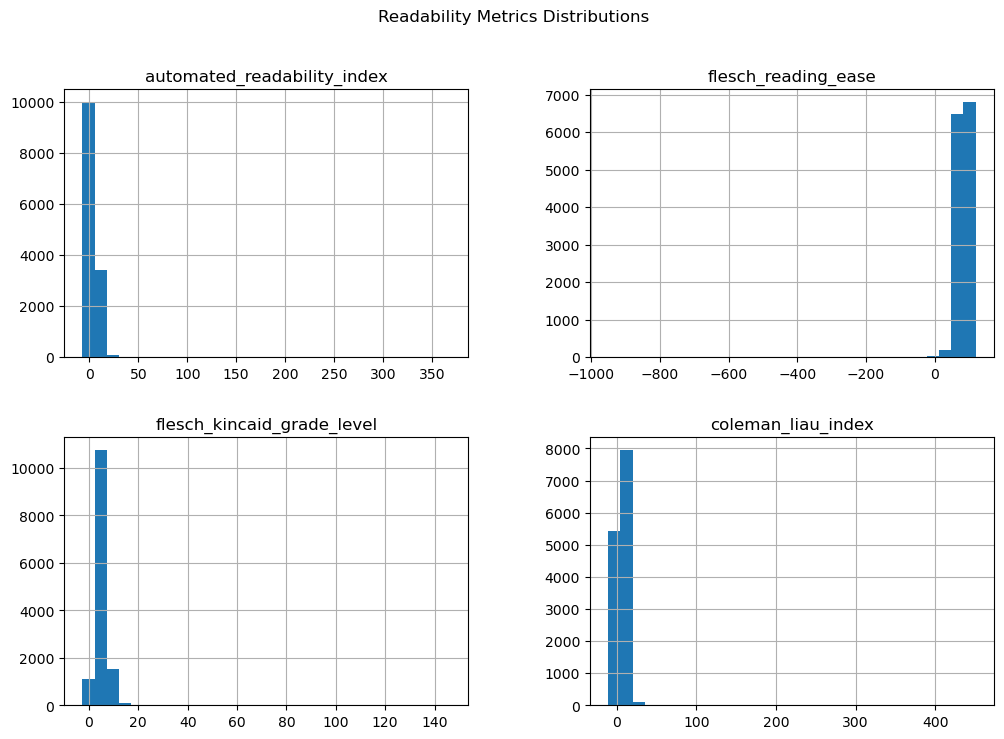

In [6]:
text_col = "post"  # the post text is in the "post" column

if text_col in data.columns:
    data['word_count'] = data[text_col].apply(lambda x: len(str(x).split()))
    print("Word Count Statistics:")
    print(data['word_count'].describe())
    
    plt.figure(figsize=(10, 6))
    plt.hist(data['word_count'], bins=50, edgecolor='black')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.title('Distribution of Post Word Counts')
    plt.show()
else:
    print(f"No column named '{text_col}' found. Please check your columns.")


# Plot some readability metrics for analysis
readability_cols = ["automated_readability_index", "flesch_reading_ease", "flesch_kincaid_grade_level", "coleman_liau_index"]
available_readability = [col for col in readability_cols if col in data.columns]
if available_readability:
    data[available_readability].hist(bins=30, figsize=(12, 8), layout=(2, 2))
    plt.suptitle("Readability Metrics Distributions")
    plt.show()
else:
    print("No standard readability columns found. Please check your dataset.")

## Step 4: Sentiment Analysis

Exploring sentiment scores to understand the emotional tone of posts.

**Columns to check:**  
- `sent_neg`, `sent_neu`, `sent_pos`, `sent_compound`



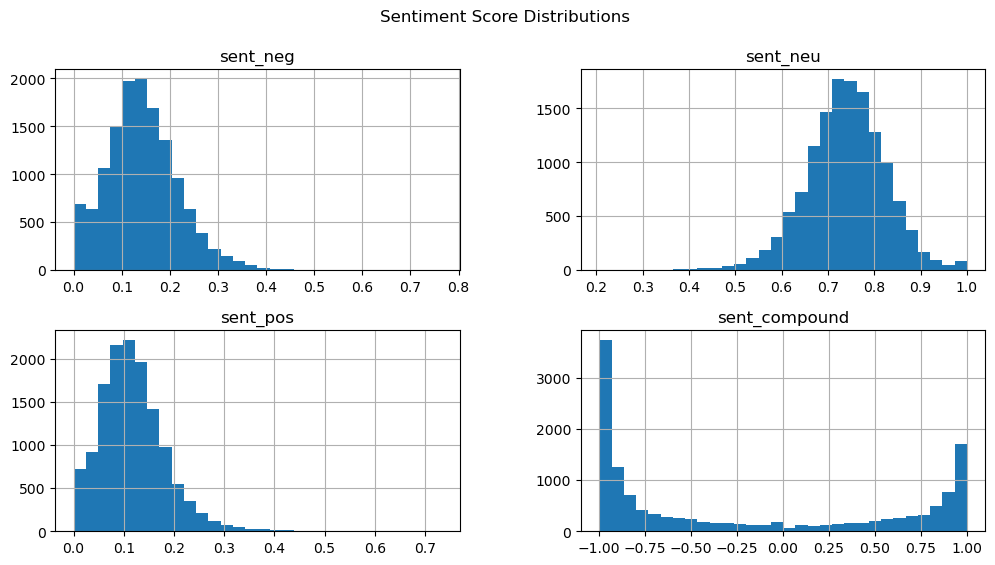

In [7]:
sentiment_cols = ["sent_neg", "sent_neu", "sent_pos", "sent_compound"]
available_sentiments = [col for col in sentiment_cols if col in data.columns]
if available_sentiments:
    data[available_sentiments].hist(bins=30, figsize=(12, 6))
    plt.suptitle("Sentiment Score Distributions")
    plt.show()
else:
    print("Sentiment columns not found in the dataset.")


#TODO

## Step 5: Analysis of LIWC and Stress-related Features

Our dataset contains several LIWC metrics (e.g., `liwc_1st_pers`, `liwc_anxiety`, etc.) and stress indicators
(e.g., `economic_stress_total`, `isolation_total`, `suicidality_total`). Let's inspect a few of these.



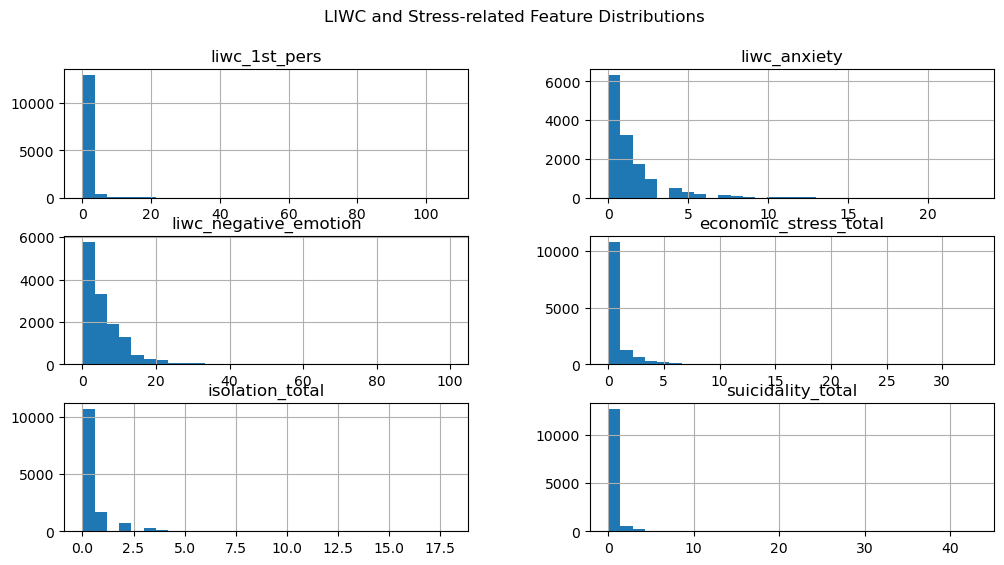

In [8]:
# Select a few LIWC and stress-related columns for quick inspection.
liwc_stress_cols = ["liwc_1st_pers", "liwc_anxiety", "liwc_negative_emotion",
                    "economic_stress_total", "isolation_total", "suicidality_total"]
available_liwc_stress = [col for col in liwc_stress_cols if col in data.columns]

if available_liwc_stress:
    data[available_liwc_stress].hist(bins=30, figsize=(12, 6))
    plt.suptitle("LIWC and Stress-related Feature Distributions")
    plt.show()
else:
    print("No LIWC or stress-related columns found. Please verify column names.")


## Step 6: TF-IDF Features Exploration

The filename suffix indicates precomputed TF-IDF features with 256 dimensions.
We will extract columns starting with "tfidf_" and apply PCA for visualization.



Number of TF-IDF features found: 256


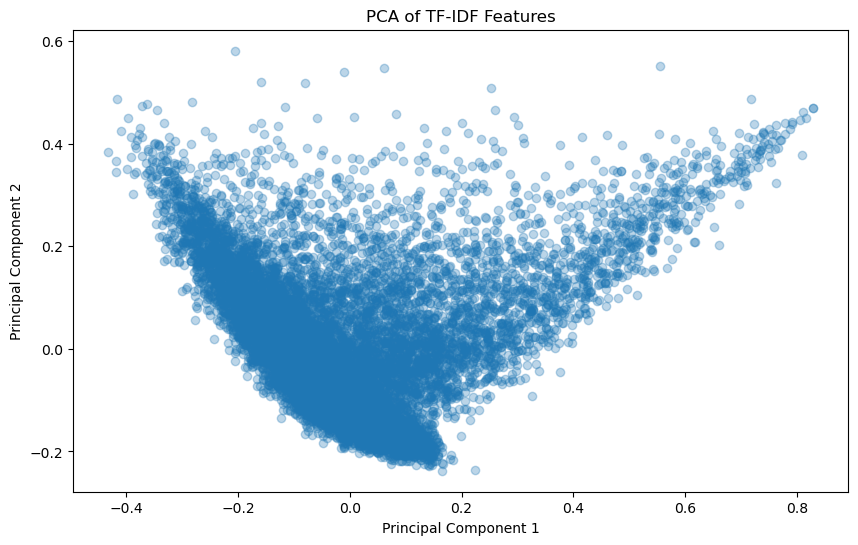

In [9]:
tfidf_cols = [col for col in data.columns if col.startswith("tfidf_")]
print(f"Number of TF-IDF features found: {len(tfidf_cols)}")

if tfidf_cols:
    # Use PCA to reduce TF-IDF features to 2 dimensions for visualization.
    tfidf_data = data[tfidf_cols].fillna(0)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tfidf_data)
    
    # Create a DataFrame for the PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of TF-IDF Features')
    plt.show()
else:
    print("No TF-IDF feature columns found.")

## Step 7: Temporal Trends

The dataset contains a `date` column (format: YYYY/MM/DD). We'll convert it to datetime and examine posting trends.


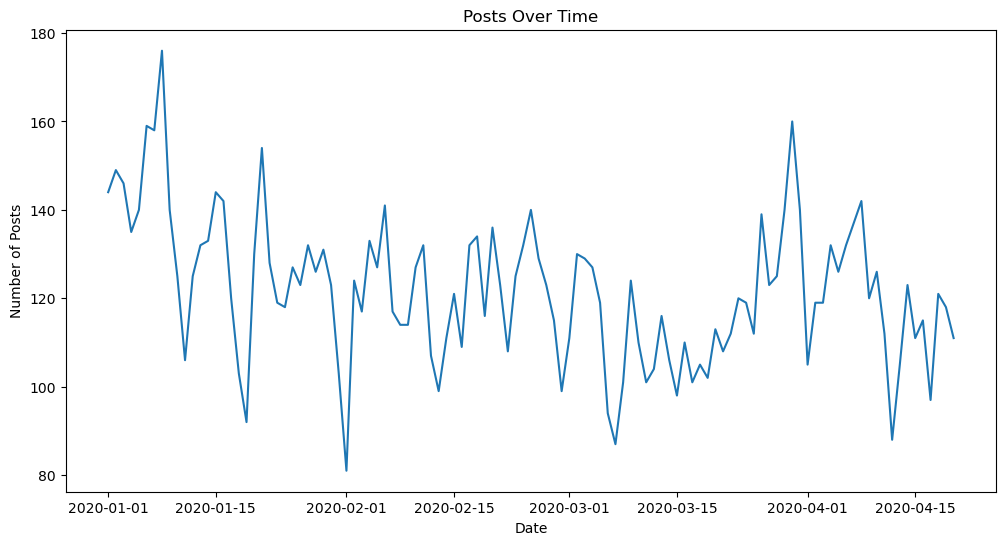

In [10]:
timestamp_col = "date"  # from the header
if timestamp_col in data.columns:
    try:
        data['datetime'] = pd.to_datetime(data[timestamp_col], format="%Y/%m/%d", errors='coerce')
        # Drop rows with unparseable dates
        data = data.dropna(subset=['datetime'])
        data.set_index('datetime', inplace=True)
        daily_counts = data.resample('D').size()
        
        plt.figure(figsize=(12, 6))
        plt.plot(daily_counts.index, daily_counts.values)
        plt.xlabel('Date')
        plt.ylabel('Number of Posts')
        plt.title('Posts Over Time')
        plt.show()
    except Exception as e:
        print(f"Error processing the date column: {e}")
else:
    print(f"No column named '{timestamp_col}' found.")



## Step 8: Correlation Analysis

Compute the correlation matrix for key numerical features (readability, sentiment, LIWC, stress, etc.)
This may reveal relationships that could inform our prompt design for LLMs.


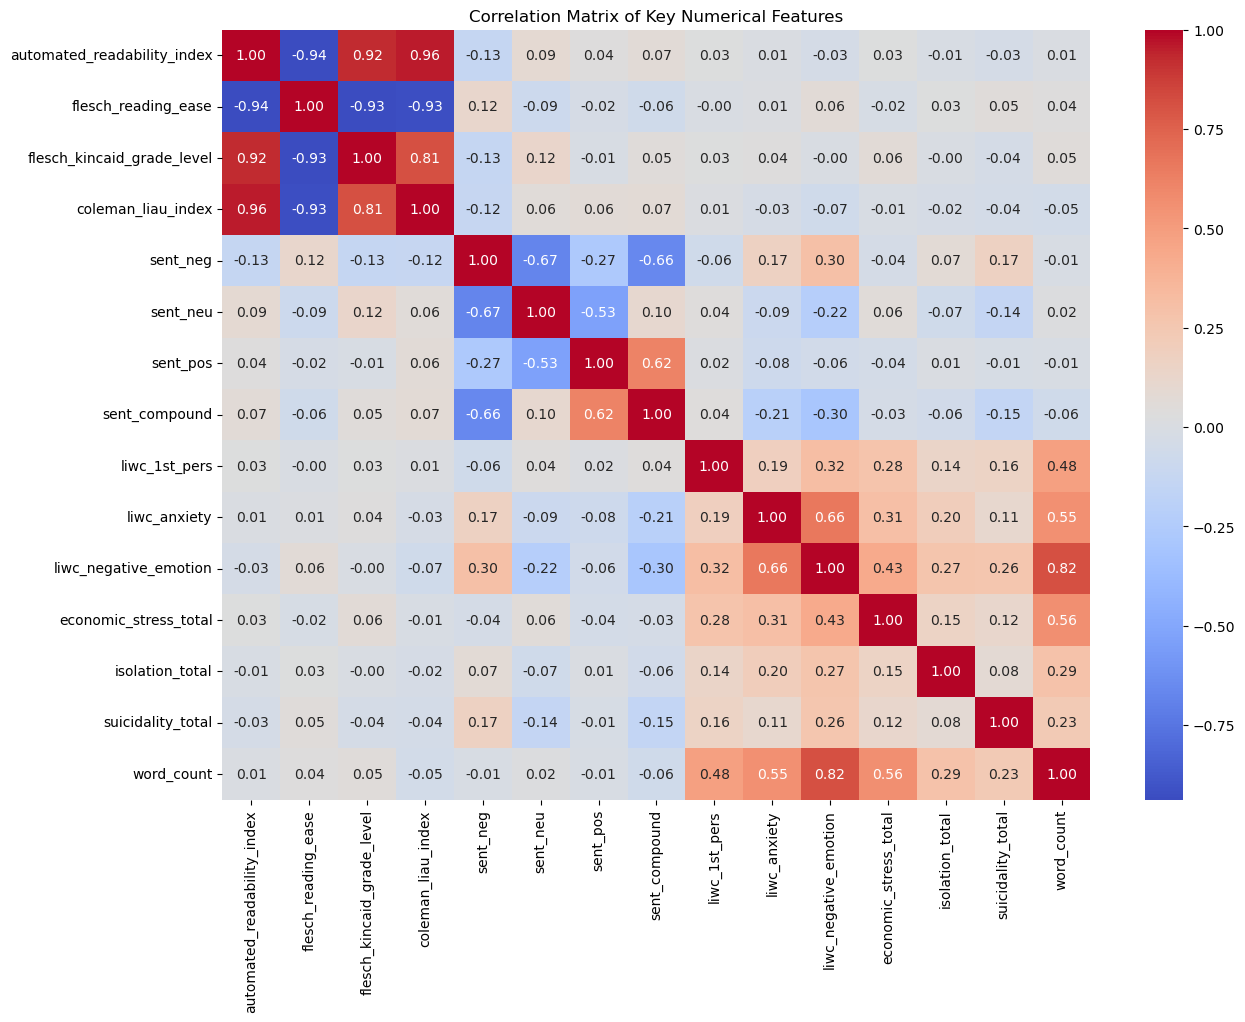

In [11]:
# Define a list of key columns to include in the correlation analysis.
key_cols = available_readability + available_sentiments + available_liwc_stress + ["word_count"]
key_cols = [col for col in key_cols if col in data.columns]

if key_cols:
    corr_matrix = data[key_cols].corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix of Key Numerical Features")
    plt.show()
else:
    print("No key numerical features found for correlation analysis.")


## Step 9: Manual Inspection of Sample Posts

let's sample a few posts to manually inspect their content and understand the language style.


In [12]:
sample_columns = [text_col]
if "subreddit" in data.columns:
    sample_columns.append("subreddit")
    
sample_posts = data[sample_columns].sample(5, random_state=42)
print("Random Sample of Posts:")
print(sample_posts.to_markdown(index=False))



Random Sample of Posts:
| post                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          